In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,
    plot_confusion_matrix, plot_roc_curve
)

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
plt.style.use("fivethirtyeight")
sns.set_style('whitegrid')
%matplotlib inline
import warnings; warnings.simplefilter('ignore')


In [2]:
data = pd.read_csv("lending_club_loan_two.csv")
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [3]:
data.shape

(396030, 27)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [5]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [6]:
data.iloc[0]

loan_amnt                                                      10000.0
term                                                         36 months
int_rate                                                         11.44
installment                                                     329.48
grade                                                                B
sub_grade                                                           B4
emp_title                                                    Marketing
emp_length                                                   10+ years
home_ownership                                                    RENT
annual_inc                                                    117000.0
verification_status                                       Not Verified
issue_d                                                       Jan-2015
loan_status                                                 Fully Paid
purpose                                                       vacation
title 

ANALYSING THE DATA

<AxesSubplot:xlabel='loan_status', ylabel='count'>

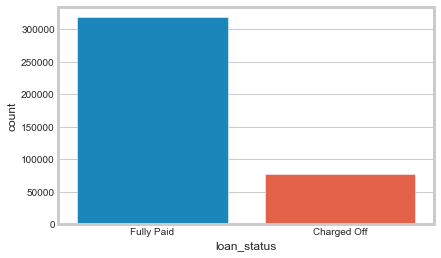

In [7]:
sns.countplot(data.loan_status)

In [8]:
data['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

<AxesSubplot:>

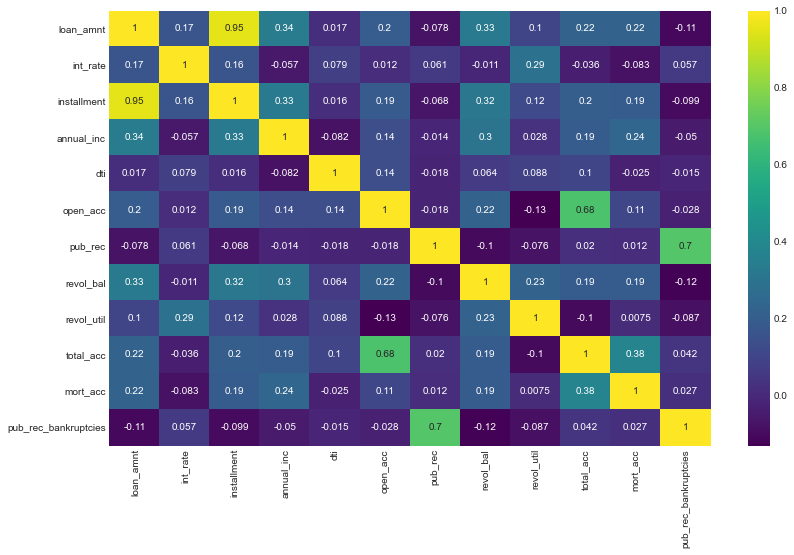

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

In [10]:
# installment and loan_amnt are highly corelated

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

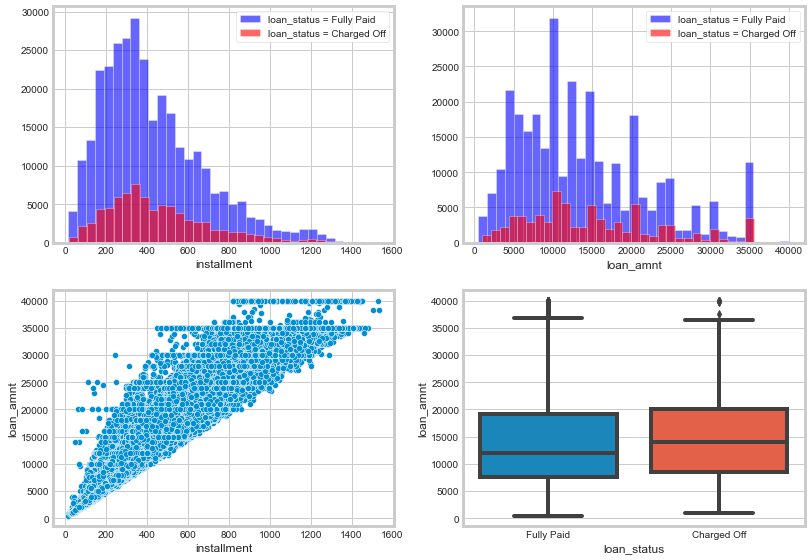

In [11]:
plt.figure(figsize=(12, 20))

plt.subplot(4, 2, 1)
data[data["loan_status"] == "Fully Paid"]["installment"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["installment"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("installment")

plt.subplot(4, 2, 2)
data[data["loan_status"] == "Fully Paid"]["loan_amnt"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["loan_amnt"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("loan_amnt")

plt.subplot(4, 2, 3)
sns.scatterplot(x='installment', y='loan_amnt', data=data)

plt.subplot(4, 2, 4)
sns.boxplot(x='loan_status', y='loan_amnt', data=data)

In [12]:
data.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [13]:
print(f"GRADE unique: {data.grade.unique()}")
print(f"SUB_GRADE unique: {data.sub_grade.unique()}")

GRADE unique: ['B' 'A' 'C' 'E' 'D' 'F' 'G']
SUB_GRADE unique: ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


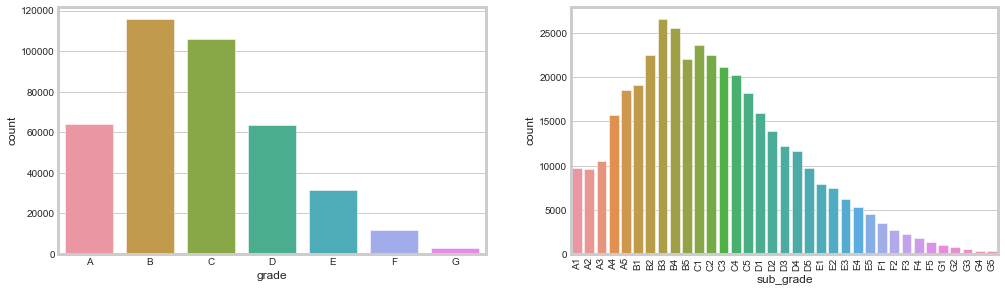

In [14]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(data.grade.unique().tolist())
sns.countplot(x='grade', data=data, order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(data.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=data, order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [15]:
# Highest no of loan seekers are belong to grade B followed by C

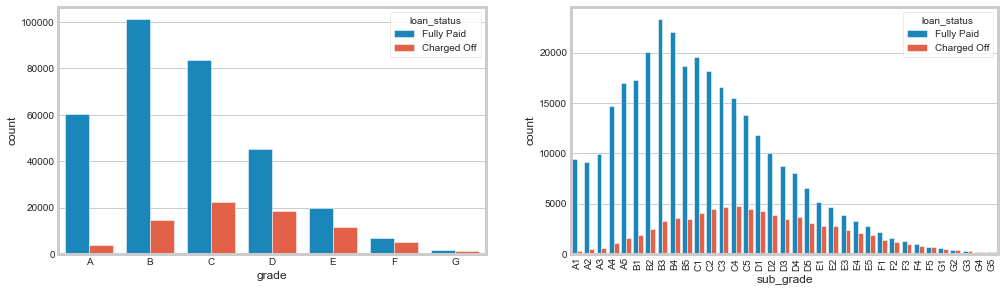

In [16]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(data.grade.unique().tolist())
sns.countplot(x='grade', data=data, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(data.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=data, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

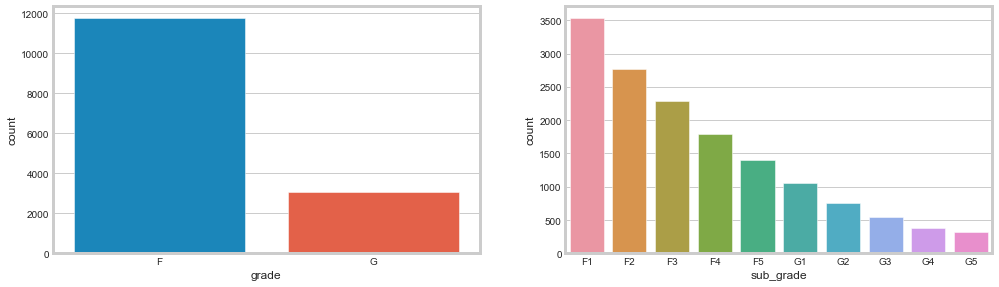

In [17]:
# F and G subgrades don't get paid back that often. Isloating them and recreating the countplot just for those subgrades.
df = data[(data.grade == 'F') | (data.grade == 'G')]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
sns.countplot(x='sub_grade', data=df, order=sub_grade)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

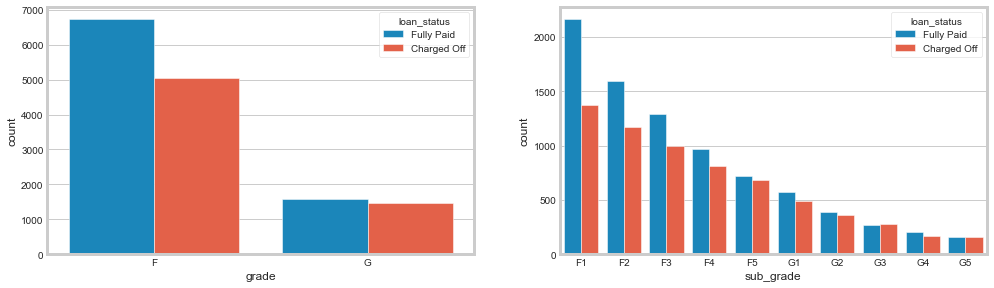

In [18]:
df = data[(data.grade == 'F') | (data.grade == 'G')]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)

In [19]:
data.home_ownership.value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [20]:
data.loc[(data.home_ownership == 'ANY') | (data.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'  
data.home_ownership.value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

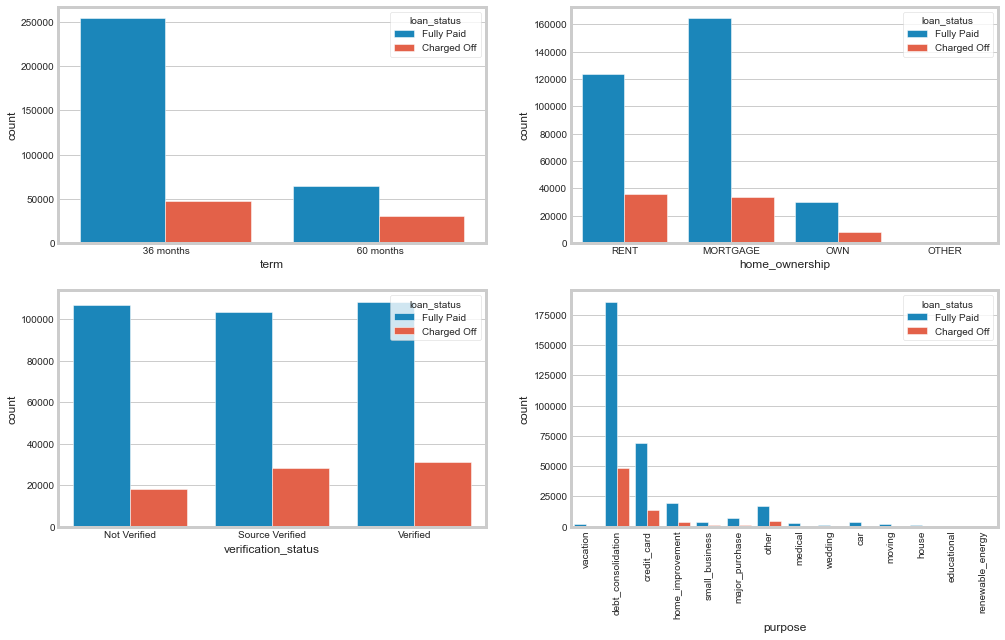

In [21]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=data, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=data, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=data, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=data, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

Text(0.5, 0, 'annual_inc')

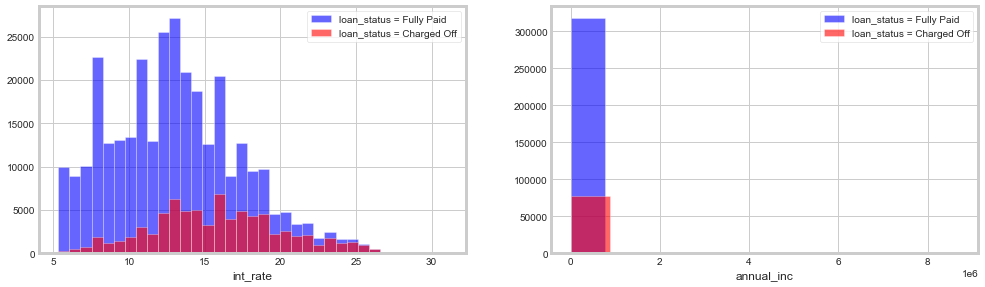

In [22]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
data[data["loan_status"] == "Fully Paid"]["int_rate"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["int_rate"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("int_rate")

plt.subplot(2, 2, 2)
data[data["loan_status"] == "Fully Paid"]["annual_inc"].hist(bins=10, color='blue', label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["annual_inc"].hist(bins=10, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("annual_inc")

In [23]:
data['annual_inc'].describe()

count    3.960300e+05
mean     7.420318e+04
std      6.163762e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.400000e+04
75%      9.000000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64

In [24]:
data[data.annual_inc >= 1000000].shape

(75, 27)

In [25]:
# loans with high intersest rate are more likely to be unpaid.
# Only 75 borrowers have an annual income more than 1 million.

In [26]:
data.emp_title.isna().sum()

22927

In [27]:
data.emp_title.value_counts()

Teacher                                   4389
Manager                                   4250
Registered Nurse                          1856
RN                                        1846
Supervisor                                1830
                                          ... 
Weiss & Kala, LLC                            1
Dept of Navy-Naval Air Systems Command       1
Kiwiplan                                     1
ALHAMBRA HEALTHCARE & WELLNESS CENTRE        1
Director, Strategic Account Management       1
Name: emp_title, Length: 173105, dtype: int64

In [28]:
data['emp_title'] = data.emp_title.str.lower()
def manager(string):
    if type(string) is str:
        return 'manager' if 'manager' in string else string

def president(string):
    if type(string) is str:
        return 'president' if 'president' in string else string
    
def nurse(string):
    if type(string) is str:
        return 'nurse' if 'nurse' in string else string
    
def driver(string):
    if type(string) is str:
        return 'driver' if 'driver' in string else string
    
def assistant(string):
    if type(string) is str:
        return 'assistant' if 'assistant' in string else string

def engineer(string):
    if type(string) is str:
        return 'engineer' if 'engineer' in string else string    

functions = [manager, president, nurse, driver, assistant, engineer]
for func in functions:
    data['emp_title'] = data.emp_title.apply(func)

In [29]:
data.emp_title.value_counts()

manager                       39831
engineer                       8603
assistant                      7548
driver                         5743
teacher                        5430
                              ...  
pbgh                              1
atlantic business products        1
gna/rehab aide                    1
trendy entertainment              1
e.l.i.t.a                         1
Name: emp_title, Length: 139595, dtype: int64

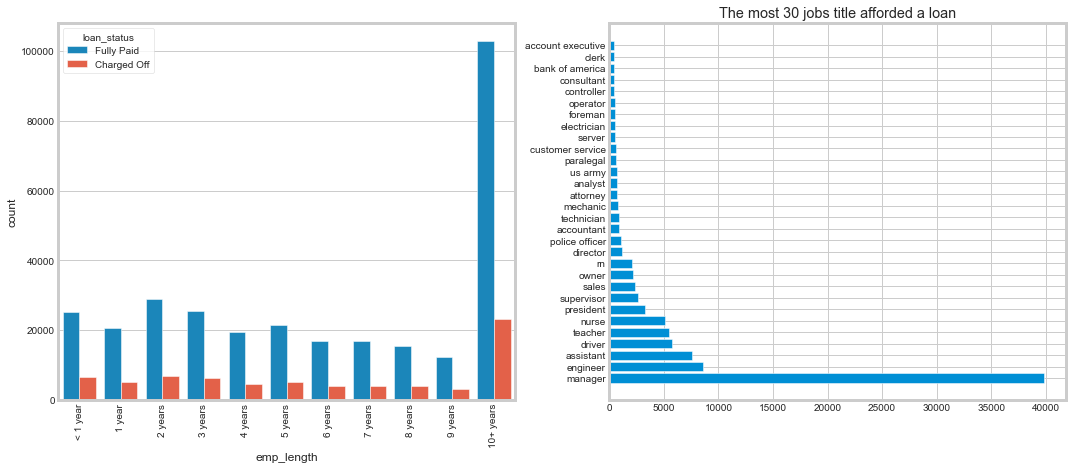

In [30]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years']
g = sns.countplot(x='emp_length', data=data, hue='loan_status', order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

plt.subplot(2, 2, 2)
plt.barh(data.emp_title.value_counts()[:30].index, data.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()

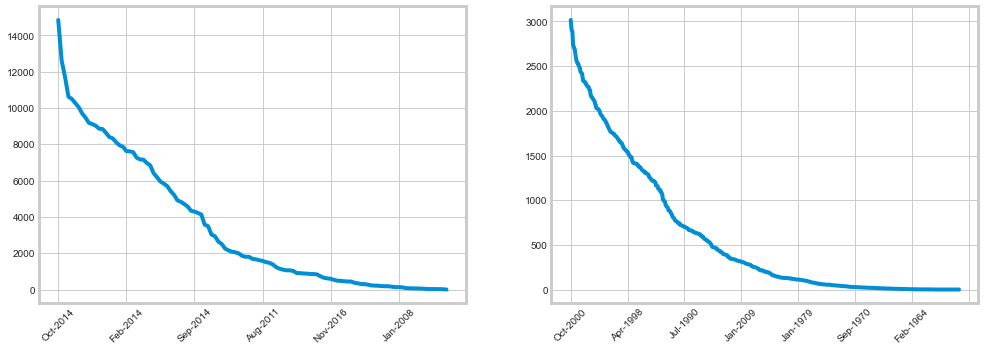

In [31]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
g = data.issue_d.value_counts().plot()
g.set_xticklabels(g.get_xticklabels(), rotation=45);

plt.subplot(2, 2, 2)
g = data.earliest_cr_line.value_counts().plot()
g.set_xticklabels(g.get_xticklabels(), rotation=45);

In [32]:
data.title.isna().sum()

1755

In [33]:
data['title'].value_counts()

Debt consolidation                       152472
Credit card refinancing                   51487
Home improvement                          15264
Other                                     12930
Debt Consolidation                        11608
                                          ...  
Loan to a Reliable Borrower                   1
Get Rid of High Interest Credit Cards         1
Time to get out of debt for Jonathan          1
credit card round up                          1
Pet Sitting/Dog Walking                       1
Name: title, Length: 48817, dtype: int64

In [34]:
print(pd.concat([data.iloc[:10]['title'] ,data.iloc[:10]['purpose'] ], axis =1 ))

                     title             purpose
0                 Vacation            vacation
1       Debt consolidation  debt_consolidation
2  Credit card refinancing         credit_card
3  Credit card refinancing         credit_card
4    Credit Card Refinance         credit_card
5       Debt consolidation  debt_consolidation
6         Home improvement    home_improvement
7     No More Credit Cards         credit_card
8       Debt consolidation  debt_consolidation
9       Debt Consolidation  debt_consolidation


In [35]:
#title can be removed because we have the purpose column with is generated from it.

Text(0.5, 0, 'total_acc')

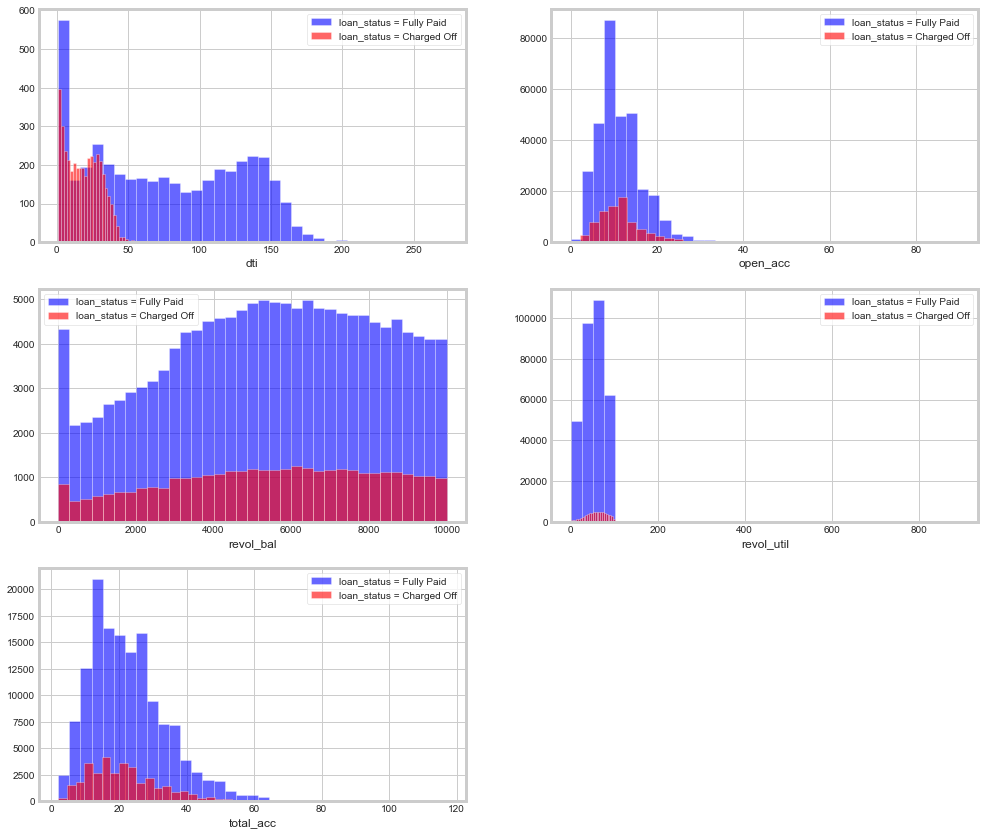

In [36]:
plt.figure(figsize=(15, 30))

plt.subplot(6, 2, 1)
data[data["loan_status"] == "Fully Paid"]["dti"].value_counts().hist(bins=35, color='blue', 
                                                                     label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["dti"].value_counts().hist(bins=35, color='red', 
                                                                      label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("dti")

plt.subplot(6, 2, 2)
data[data["loan_status"] == "Fully Paid"]["open_acc"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["open_acc"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("open_acc")

plt.subplot(6, 2, 3)
df = data[(data.revol_bal <= 10000)]
df[df["loan_status"] == "Fully Paid"]["revol_bal"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
df[df["loan_status"] == "Charged Off"]["revol_bal"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("revol_bal")

plt.subplot(6, 2, 4)
data[data["loan_status"] == "Fully Paid"]["revol_util"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
data[data["loan_status"] == "Charged Off"]["revol_util"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("revol_util")

plt.subplot(6, 2, 5)
df = data[(data.revol_bal <= 10000)]
df[df["loan_status"] == "Fully Paid"]["total_acc"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
df[df["loan_status"] == "Charged Off"]["total_acc"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("total_acc")

In [37]:
#smaller the dti the more likely that the loan will not be paid.

In [38]:
data.pub_rec.value_counts()

0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
15.0         1
40.0         1
86.0         1
17.0         1
24.0         1
Name: pub_rec, dtype: int64

In [39]:
data.initial_list_status.value_counts()

f    238066
w    157964
Name: initial_list_status, dtype: int64

In [40]:
data.application_type.value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [41]:
data.mort_acc.value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
31.0         2
26.0         2
32.0         2
28.0         1
34.0         1
30.0         1
Name: mort_acc, dtype: int64

In [42]:
data.pub_rec_bankruptcies.value_counts()

0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [43]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1
    
def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

data['pub_rec'] = data.pub_rec.apply(pub_rec)
data['mort_acc'] = data.mort_acc.apply(mort_acc)
data['pub_rec_bankruptcies'] = data.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='count'>

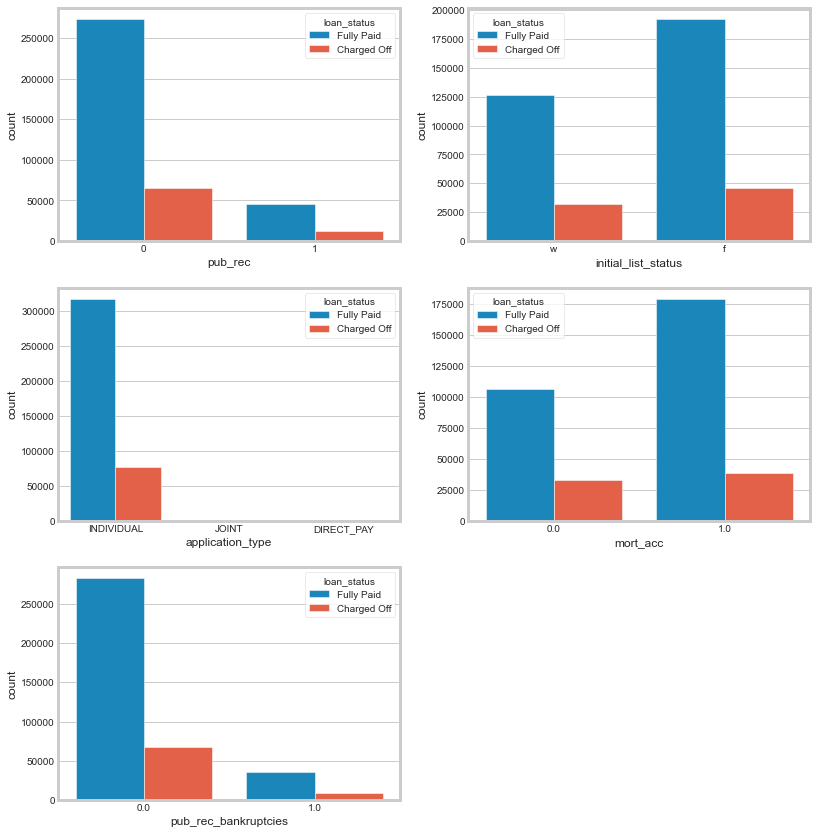

In [44]:
plt.figure(figsize=(12, 30))

plt.subplot(6, 2, 1)
sns.countplot(x='pub_rec', data=data, hue='loan_status')

plt.subplot(6, 2, 2)
sns.countplot(x='initial_list_status', data=data, hue='loan_status')

plt.subplot(6, 2, 3)
sns.countplot(x='application_type', data=data, hue='loan_status')

plt.subplot(6, 2, 4)
sns.countplot(x='mort_acc', data=data, hue='loan_status')

plt.subplot(6, 2, 5)
sns.countplot(x='pub_rec_bankruptcies', data=data, hue='loan_status')

In [45]:
data['loan_status'] = data.loan_status.map({'Fully Paid':0, 'Charged Off':1})


<AxesSubplot:>

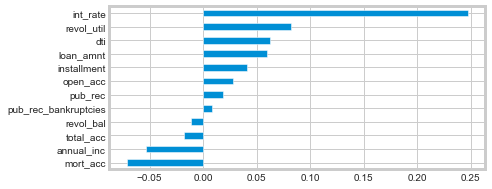

In [46]:
plt.figure(figsize=(6, 3))
data.corr()['loan_status'].drop('loan_status').sort_values().plot(kind='barh')


DATA PREPROCESSING

In [47]:
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        percentage = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' i.e '{percentage:.3f}%'")

'emp_title': number of missing values '22927' i.e '5.789%'
'emp_length': number of missing values '18301' i.e '4.621%'
'title': number of missing values '1755' i.e '0.443%'
'revol_util': number of missing values '276' i.e '0.070%'
'mort_acc': number of missing values '37795' i.e '9.543%'
'pub_rec_bankruptcies': number of missing values '535' i.e '0.135%'


In [48]:
data.emp_title.nunique()

139595

In [49]:
#too many unique job titles to try to convert this to a dummy variable
#title column is a string description of the purpose column

In [50]:
for year in data.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{data[data.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('\n')

10+ years years in this position:
0    0.815814
1    0.184186
Name: loan_status, dtype: float64


4 years years in this position:
0    0.807615
1    0.192385
Name: loan_status, dtype: float64


< 1 year years in this position:
0    0.793128
1    0.206872
Name: loan_status, dtype: float64


6 years years in this position:
0    0.810806
1    0.189194
Name: loan_status, dtype: float64


9 years years in this position:
0    0.79953
1    0.20047
Name: loan_status, dtype: float64


2 years years in this position:
0    0.806738
1    0.193262
Name: loan_status, dtype: float64


3 years years in this position:
0    0.804769
1    0.195231
Name: loan_status, dtype: float64


8 years years in this position:
0    0.80024
1    0.19976
Name: loan_status, dtype: float64


7 years years in this position:
0    0.805226
1    0.194774
Name: loan_status, dtype: float64


5 years years in this position:
0    0.807813
1    0.192187
Name: loan_status, dtype: float64


1 year years in this position:
0    0.800

In [51]:
# the fully paid and charge off rates are very similar w.r.t all the values in emp_length

In [52]:
data.drop(['title','emp_length','emp_title'], axis=1, inplace=True)

In [53]:
data.shape

(396030, 24)

In [54]:
print('unique values and their counts are :' , data.mort_acc.value_counts())
print('no. of null values :' ,data.mort_acc.isna().sum())

unique values and their counts are : 1.0    218458
0.0    139777
Name: mort_acc, dtype: int64
no. of null values : 37795


<AxesSubplot:>

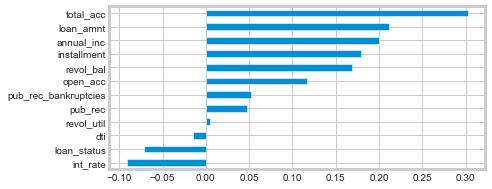

In [55]:
plt.figure(figsize=(6, 3))
data.corr()['mort_acc'].drop('mort_acc').sort_values().plot(kind='barh')

In [56]:
# total_acc corelates the most with mort_acc

In [57]:
total_acc_avg = data.groupby(by='total_acc').mean().mort_acc

In [58]:
total_acc_avg

total_acc
2.0      0.000000
3.0      0.046243
4.0      0.062140
5.0      0.090789
6.0      0.121983
           ...   
124.0    1.000000
129.0    1.000000
135.0    1.000000
150.0    1.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [59]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

In [60]:
data['mort_acc'] = data.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [61]:
data['mort_acc']

0         0.0
1         1.0
2         0.0
3         0.0
4         1.0
         ... 
396025    0.0
396026    1.0
396027    0.0
396028    1.0
396029    1.0
Name: mort_acc, Length: 396030, dtype: float64

In [62]:
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'revol_util': number of missing values '276' ==> '0.070%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


In [63]:
# they account for less than 0.5% of the total data ,removing the rows that are missing those values in those columns .

In [64]:
data.dropna(inplace=True)

In [65]:
data.shape

(395219, 24)

In [66]:
# categorical columns
print([column for column in data.columns if data[column].dtype == object])

['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']


In [67]:
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [68]:
term_values = {' 36 months': 36, ' 60 months': 60}
data['term'] = data.term.map(term_values)

In [69]:
data.drop('grade', axis=1, inplace=True)

In [70]:
dummies = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status', 
           'application_type', 'home_ownership']
data = pd.get_dummies(data, columns=dummies, drop_first=True)

In [71]:
data.address.head()

0       0174 Michelle Gateway\r\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3              823 Reid Ford\r\nDelacruzside, MA 00813
4               679 Luna Roads\r\nGreggshire, VA 11650
Name: address, dtype: object

In [72]:
# extracting zip code from the adress
data['zip_code'] = data.address.apply(lambda x: x[-5:])

In [73]:
data['zip_code']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: zip_code, Length: 395219, dtype: object

In [74]:
data.zip_code.value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [75]:
data = pd.get_dummies(data, columns=['zip_code'], drop_first=True)
data.drop('address', axis=1, inplace=True)

In [76]:
#issue date will tell us if the loan was issed or not 
data.drop('issue_d', axis=1, inplace=True)

In [77]:
data['earliest_cr_line'] 

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [78]:
# extracting the year 
data['earliest_cr_line'] = data.earliest_cr_line.str.split('-', expand=True)[1]

In [79]:
data['earliest_cr_line'] 

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [80]:
data.earliest_cr_line.nunique()

65

In [81]:
#print(f"Data shape: {data.shape}")

# # Remove duplicate Features
#data = data.T.drop_duplicates()
#data = data.T

# # Remove Duplicate Rows
#data.drop_duplicates(inplace=True)

#print(f"Data shape:Data shape: (395219, 79)


##output for the above code 
## Data shape: (395219, 79)
## Data shape: (395219, 79)

In [82]:
w_p = data.loan_status.value_counts()[0] / data.shape[0]
w_n = data.loan_status.value_counts()[1] / data.shape[0]

print(f"Weight of positive values {w_p}")
print(f"Weight of negative values {w_n}")


Weight of positive values 0.8038479931379817
Weight of negative values 0.19615200686201828


In [83]:
X = data.drop('loan_status', axis=1)
y = data.loan_status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(276653, 78)
(118566, 78)
(276653,)
(118566,)


In [84]:
# scaling the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [86]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [ ]:
#n_estimators = [50, 100, 200]
#learning_rate = [0.05, 0.01, 0.5, 0.1, 1]
#tree_method = ['gpu_hist']

#param_grid = dict(
#    n_estimators=stats.randint(10, 200),
    max_depth=stats.randint(1, 5),
    learning_rate=stats.uniform(0, 1)
##     'learning_rate': learning_rate)

#xgb_clf = XGBClassifier()
#xgb_cv = RandomizedSearchCV(
#   xgb_clf, param_grid, cv=3, n_iter=60, 
#    scoring='roc_auc', n_jobs=-1, verbose=1)
#xgb_cv.fit(X_train, y_train)

#best_params = xgb_cv.best_params_
#best_params['tree_method'] = 'gpu_hist'
# best_params = {'n_estimators': 50, 'tree_method': 'gpu_hist'}
#print(f"Best Parameters: {best_params}")

#xgb_clf = XGBClassifier(**best_params)
#xgb_clf.fit(X_train, y_train)

#y_train_pred = xgb_clf.predict(X_train)
#y_test_pred = xgb_clf.predict(X_test)

#print_score(y_train, y_train_pred, train=True)
#print_score(y_test, y_test_pred, train=False)

In [ ]:
#disp = plot_confusion_matrix(xgb_clf, X_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Fully-Paid', 'Default'])

#disp = plot_roc_curve(xgb_clf, X_test, y_test)

In [ ]:
#scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),

In [87]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                     0.0           1.0  accuracy      macro avg   weighted avg
precision       0.999969      1.000000  0.999975       0.999984       0.999975
recall          1.000000      0.999871  0.999975       0.999936       0.999975
f1-score        0.999984      0.999935  0.999975       0.999960       0.999975
support    222387.000000  54266.000000  0.999975  276653.000000  276653.000000
_______________________________________________
Confusion Matrix: 
 [[222387      0]
 [     7  54259]]

Test Result:
Accuracy Score: 88.89%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy      macro avg   weighted avg
precision      0.881219      0.965836  0.888948       0.923527       0.897817
recall         0.996118      0.449757  0.888948       0.722937       0.888948
f1-score       0.935152      0.613724  0.888948    

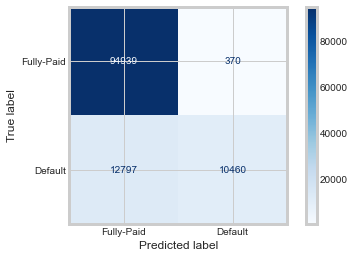

In [90]:
disp = plot_confusion_matrix(rf_clf, X_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Fully-Paid', 'Default'])

#disp = plot_roc_curve(xgb_clf, X_test, y_test)
#plot_roc_curve(rf_clf, X_test, y_test, ax=disp.ax_)

In [94]:
scores_dict={}
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test))}

In [95]:
ml_models = {
    'Random Forest': rf_clf, 
#    'XGBoost': xgb_clf
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.723


<AxesSubplot:>

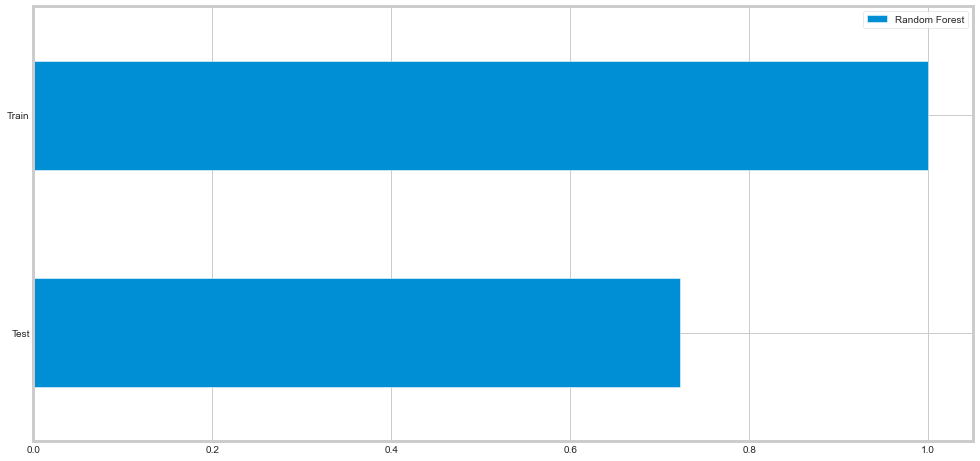

In [96]:
scores_df = pd.DataFrame(scores_dict)
scores_df.plot(kind='barh', figsize=(15, 8))